In [ ]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
import corner
from jnkepler.jaxttv import jaxttv, elements_to_pdic, params_to_elements
from jax.config import config
import numpyro, jax
config.update('jax_enable_x64', True)
#numpyro.set_host_device_count(1)
print ('# jax device count:', jax.local_device_count())

### set up and get best parameters

In [ ]:
npl = 6
datadir = "./toi1136/toi1136_fei/"
datadir = "./toi1136/toi1136_fei_2/"
import glob

In [ ]:
tcobs, errorobs, p_init = [], [], []
for i in range(npl):
    fname = glob.glob(datadir + "*_planet%d_ephemeris.txt"%(i))[0]
    tnum, tc, tcerr = np.array(pd.read_csv(fname, delim_whitespace=True)).T
    tcobs.append(tc)
    errorobs.append(tcerr)
    p, t0 = np.polyfit(tnum, tc, deg=1)
    p_init.append(p)
p_init = np.array(p_init)

In [ ]:
import itertools
tclist = list(itertools.chain.from_iterable(tcobs))
print (p_init[0])
print (np.min(tclist), np.max(tclist))

In [ ]:
dt = 0.1
t_start, t_end = 1680, 2655
jttv = jaxttv(t_start, t_end, dt)

In [6]:
jttv.set_tcobs(tcobs, p_init, errorobs=errorobs)

# integration starts at:           1680.00
# first transit time in data:      1684.28
# last transit time in data:       2650.03
# integration ends at:             2655.00
# integration time step:           0.1000 (1/41 of innermost period)


In [58]:
from jnkepler.jaxttv.utils import BIG_G, tic_to_m
def get_ttvfast_elements(jttv, params, t_start, wh=True):
    pdic = pd.DataFrame(data=jttv.get_elements(params, t_start, wh=wh))
    _, marr = params_to_elements(params, jttv.nplanet)
    pdic['incl'] = np.arccos(pdic['cosi'])
    pdic['mass'] = marr[1:]
    
    names = ['BIG_G', 'smass'] 
    for j in range(npl):
        names += ['pmass%d'%j, 'period%d'%j, 'e%d'%j, 'incl%d'%j, 'lnode%d'%j, 'omega%d'%j, 'M%d'%j]
        
    pout = pd.DataFrame(data=[np.r_[np.array([BIG_G, 1.]), np.array(pdic[['mass', 'period', 'ecc', 'incl', 'lnode', 'omega', 'ma']]).ravel()]], columns=names)
    return pout

### best parameters

### comparison with TTVFast transit times from Fei

### read MCMC outputs

In [109]:
posterior = "toi1136/dt0.1_nw500_ns500_c6_mcmc.pkl"
posterior = "toi1136/nox_dt0.2_nw500_ns1500_c4_mcmc.pkl"

In [110]:
import dill
mcmc = dill.load(open(posterior, 'rb'))
samples = mcmc.get_samples()

In [111]:
keys = ['mass', 'period', 'ecosw', 'esinw', 'cosi', 'lnode', 'tic']

In [112]:
samples['ecosw'] = samples['ecc'] * np.cos(samples['omega'])
samples['esinw'] = samples['ecc'] * np.sin(samples['omega'])
samples_arr = np.array([samples[k] for k in keys])
samples_e = []
for i in range(npl):
    for j in range(6):
        samples_e.append(list(samples_arr[j+1,:,i]))
for i in range(npl):
    samples_e.append(list(np.log(samples_arr[0,:,i])))
samples_e = np.array(samples_e).T
#samples_m = np.array(samples_m).T

In [65]:
pdic_out = pd.DataFrame({})
for i in range(len(samples_e)):
    pdic_out = pdic_out.append(get_ttvfast_elements(jttv, samples_e[i], t_start, wh=False))
pdic_out = pdic_out.reset_index(drop=True)

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.000000 (time specified: 1680.000000)
# elements at time 1680.

In [66]:
#pdic_out.to_csv("toi1136/params_ttvfast_samples.csv", index=False)
pdic_out.to_csv("toi1136/params_rebound_samples.csv", index=False)

In [114]:
npl = 6

0
0
0
0
0


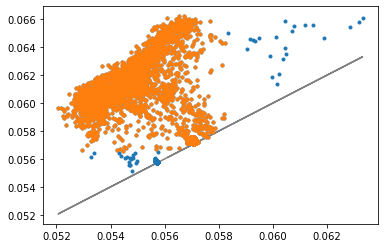

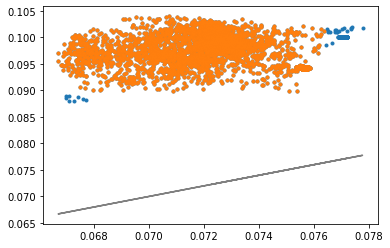

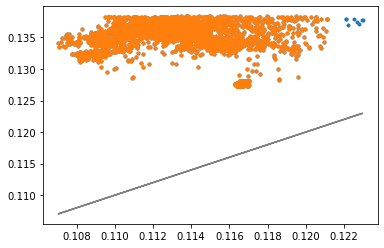

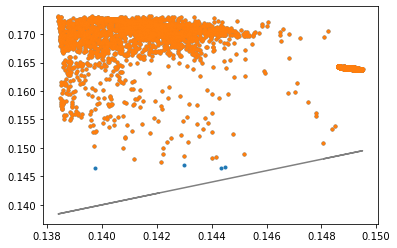

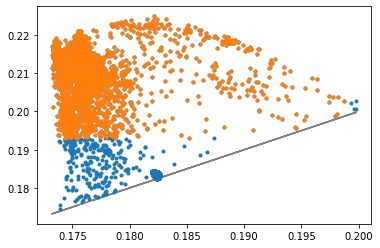

In [116]:
samples['sma'] = (samples['period']/365.25)**(2./3.)
xflag = np.zeros(len(samples['sma']))
for j in range(npl-1):
    peri = samples['sma'][:,j+1]*(1-samples['ecc'][:,j+1])
    apo = samples['sma'][:,j]*(1+samples['ecc'][:,j])
    xflag += apo > peri
    print (np.sum(xflag>0))
    plt.figure()
    plt.plot(samples['sma'][:,j]*(1+samples['ecc'][:,j]), samples['sma'][:,j]*(1+samples['ecc'][:,j]), color='gray')
    idx = (samples['ecc'][:,j]<0.15) & (samples['ecc'][:,j+1]<0.15)
    plt.plot(apo, peri, '.')
    plt.plot(apo[idx], peri[idx], '.');

In [117]:
np.shape(samples['sma'])

(6000, 6)

In [118]:
np.max((samples['sma'][:,:-1] * (1 + samples['ecc'][:,:-1])) / (samples['sma'][:,1:] * (1. - samples['ecc'][:,1:])), axis=1)

array([0.99997913, 0.9998666 , 0.99996575, ..., 0.90841628, 0.92295899,
       0.92581166])

In [119]:
samples['cnum'] = np.max((samples['sma'][:,:-1] * (1 + samples['ecc'][:,:-1])) / (samples['sma'][:,1:] * (1. - samples['ecc'][:,1:])), axis=1)

In [120]:
samples['maxe'] = np.max(samples['ecc'], axis=1)

In [121]:
M_earth = 3.0034893e-6
samples['pmass'] = samples['mass'] / M_earth
keys = ['pmass', 'tic', 'period', 'ecc', 'omega']

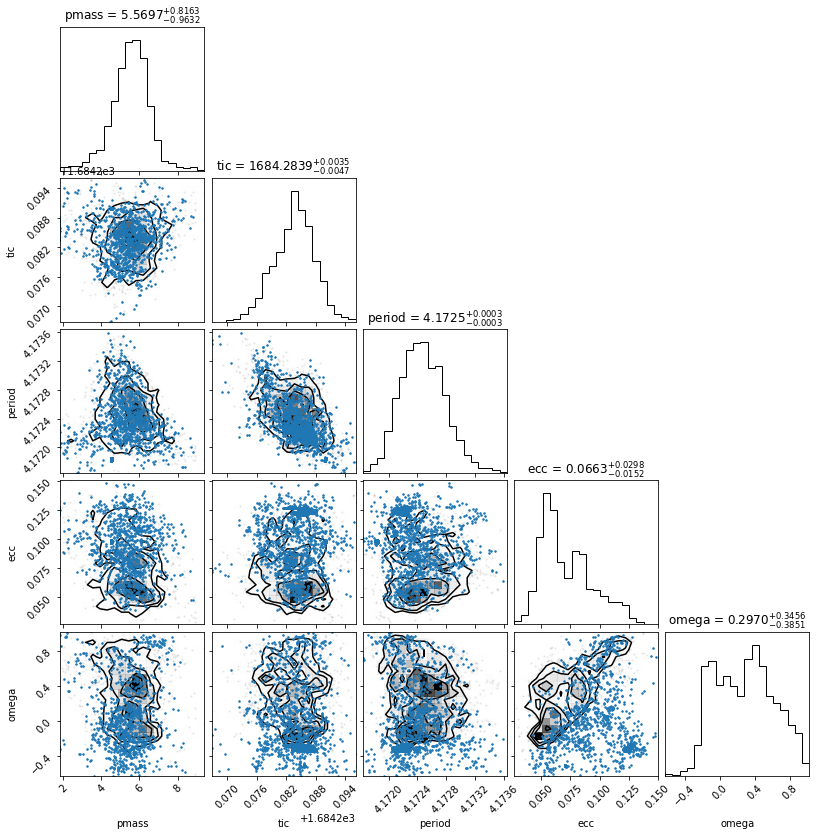

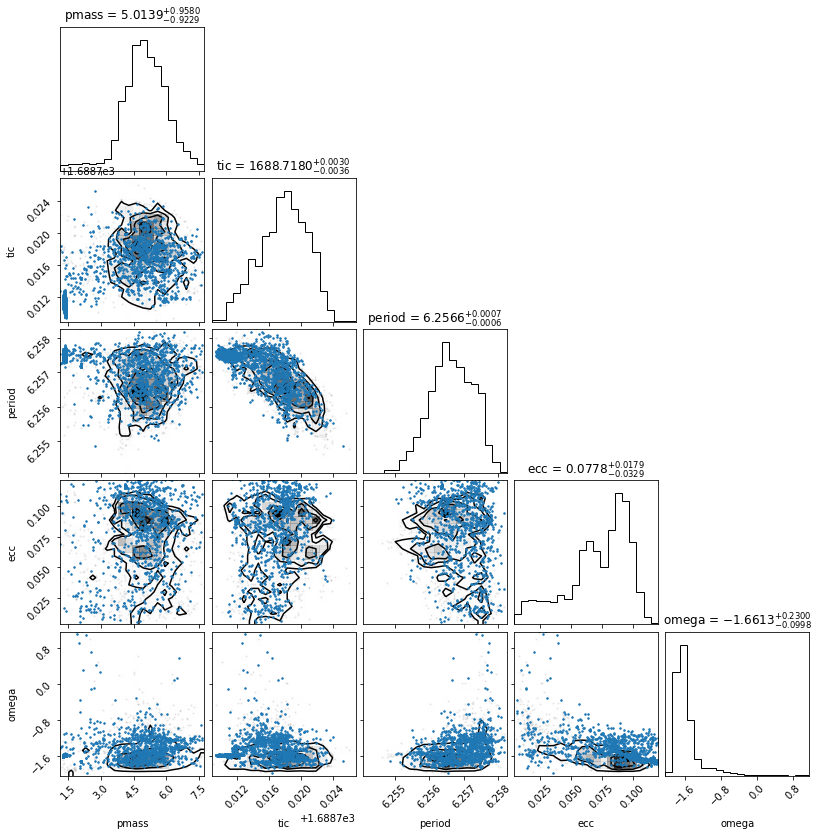

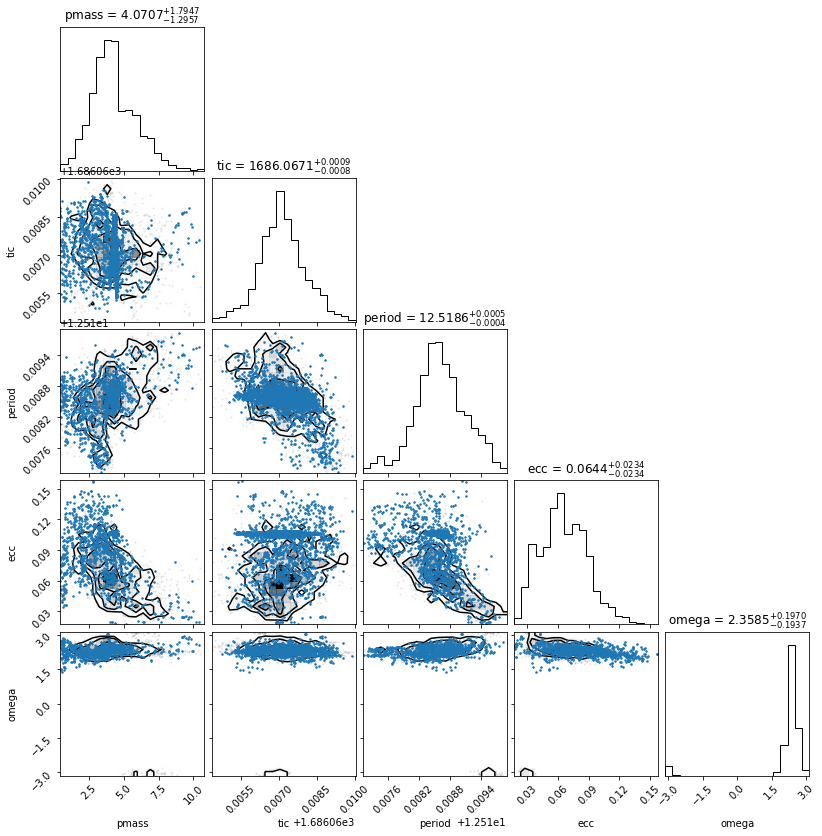

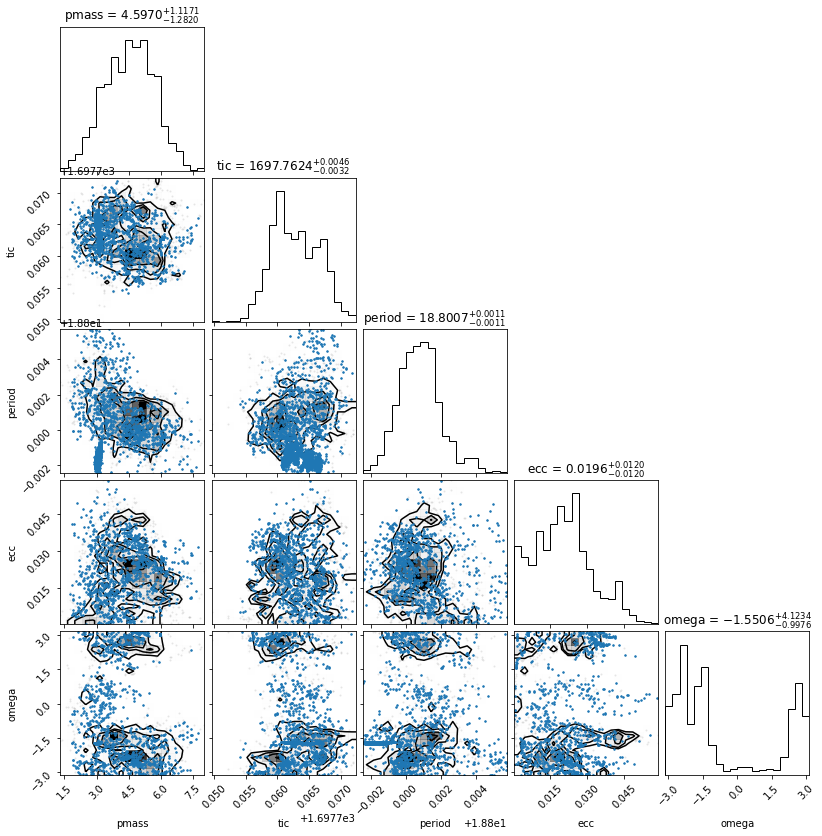

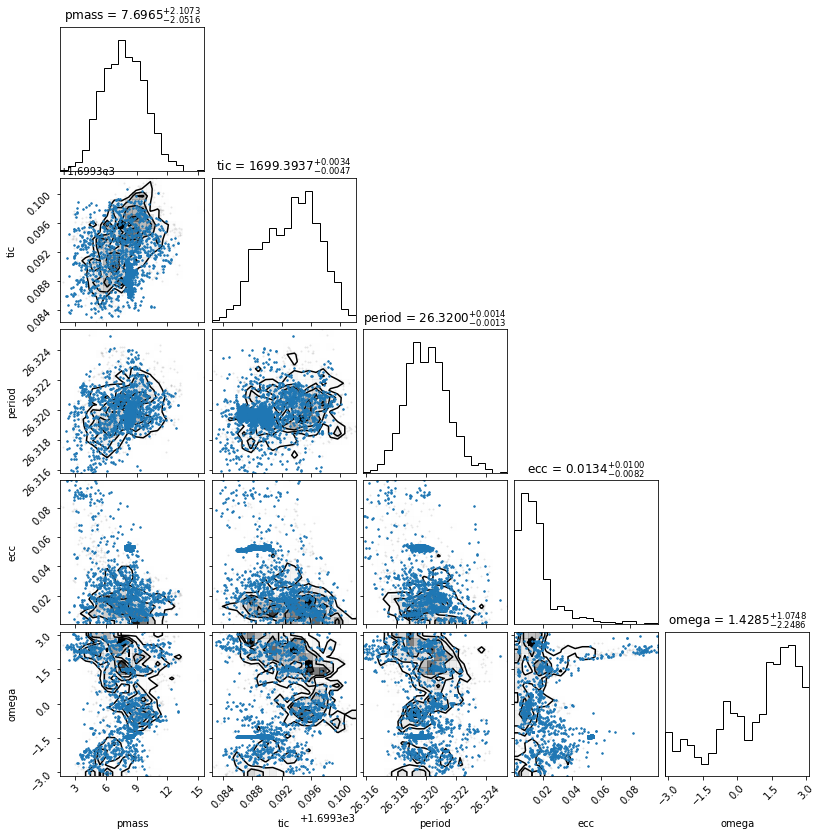

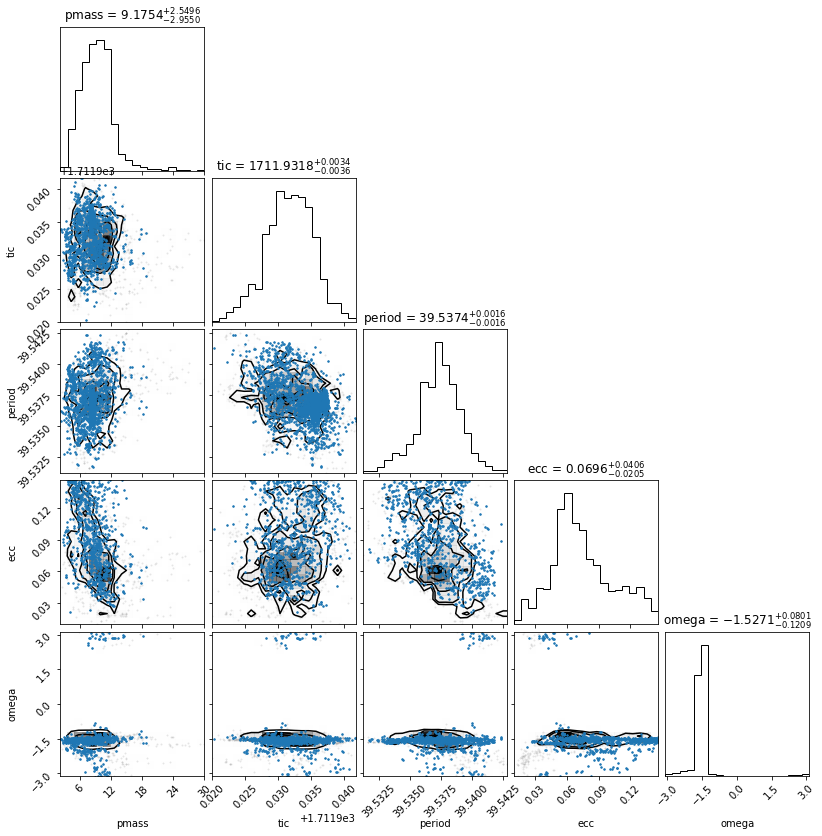

In [125]:
idx = samples['cnum']>0.9
#idx = samples['maxe']>0.2
for j in range(jttv.nplanet):
    hyperx = pd.DataFrame(data=dict(zip(keys, [samples[k][idx,j] for k in keys])))
    hyper = pd.DataFrame(data=dict(zip(keys, [samples[k][~idx,j] for k in keys])))
    labels = keys
    fig = corner.corner(hyper, labels=labels, show_titles=True, title_fmt=".4f")
    fig = corner.overplot_points(fig, hyperx, markersize=3) 
    #plt.savefig(output+"corner%d.png"%(j+1), dpi=200, bbox_inches="tight");

In [20]:
smas = np.mean((samples['period']/365.25)**(2./3.), axis=0)
eccs = np.mean(samples['ecc'], axis=0)

In [32]:
emax_a = np.hstack([smas[1:]/smas[:-1]-1., np.array(0.5)])
emax_p = np.hstack([0.5, 1. - smas[:-1]/smas[1:]])

In [44]:
np.sum(np.where(smas[:-1] * (1 + eccs[:-1]) < smas[1:] * (1. - eccs[1:]), 1, 0))

5

array([0.06009262, 0.09932731, 0.13150702, 0.16824902, 0.20194419])

In [35]:
np.fmin(emax_a, emax_p)

array([0.31009314, 0.23669549, 0.31138349, 0.23744655, 0.20089683,
       0.237643  ])

## previous prior on ecc

In [ ]:
N = int(1e6)
cw = np.random.randn(N)
sw = np.random.randn(N)
ecc = np.random.rand(N)*0.5
plt.xlim(0, 1)
plt.hist(ecc*np.sqrt(cw**2+sw**2), bins=100);